In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Auto-detect display width
pd.set_option('display.max_colwidth', None)    # Show full content in each cell


## Nạp vào và thống kê tổng quan bộ dữ liệu

In [90]:
#Đọc bộ dữ liệu
df = pd.read_csv('../Data/Team_stats_Tournamennts.csv')
df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,100,Blue,team,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Draven,Bel'Veth,LeBlanc,Jax,Poppy,Kalista,Nocturne,Akali,Pyke,Renekton,1749,0,10,14,11,0.0,0.0,0.0,0.0,1.0,0.3431,0.8233,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,1.0,1.0,8.0,5.0,0.0,2.0,35171,1206.5523,3303.8765,2168.5763,116,3.9794,54,1.8525,31,273,9.3654,51656,32438,1112.7959,50075,-0.010825,1.05,793.0,212,34.4768,17959.0,18342.0,320.0,17077.0,18109.0,323.0,882.0,233.0,-3.0,5.0,5.0,4.0,4.0,6.0,5.0,27653.0,28686.0,509.0,25924.0,29282.0,514.0,1729.0,-596.0,-5.0,6.0,7.0,5.0,5.0,8.0,6.0,36502.0,40338.0,724.0,34086.0,40490.0,717.0,2416.0,-152.0,7.0,6.0,7.0,5.0,5.0,8.0,6.0,45581.0,53080.0,904.0,44394.0,55632.0,899.0,1187.0,-2552.0,5.0,9.0,10.0,7.0,7.0,12.0,9.0
1,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,200,Red,team,G2 Esports,oe:team:7d6673d3a9d00363c6bebc1a630da6e,Caitlyn,Ashe,Rumble,Blitzcrank,Bard,Neeko,Aphelios,Renata Glasc,Vi,Gwen,1749,1,14,10,26,4.0,0.0,0.0,0.0,0.0,0.4803,0.8233,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,9.0,3.0,0.0,0.0,5.0,8.0,2.0,0.0,66376,2277.0497,2128.2333,2434.1681,109,3.7393,48,1.6467,32,218,7.4786,56807,37589,1289.5026,50620,0.010825,-1.05,825.0,191,34.8542,17077.0,18109.0,323.0,17959.0,18342.0,320.0,-882.0,-233.0,3.0,4.0,6.0,5.0,5.0,5.0,4.0,25924.0,29282.0,514.0,27653.0,28686.0,509.0,-1729.0,596.0,5.0,5.0,8.0,6.0,6.0,7.0,5.0,34086.0,40490.0,717.0,36502.0,40338.0,724.0,-2416.0,152.0,-7.0,5.0,8.0,6.0,6.0,7.0,5.0,44394.0,55632.0,899.0,45581.0,53080.0,904.0,-1187.0,2552.0,-5.0,7.0,12.0,9.0,9.0,10.0,7.0


In [91]:
df.dtypes

gameid                       object
datacompleteness             object
league                       object
year                          int64
split                        object
playoffs                      int64
date                         object
game                          int64
patch                       float64
participantid                 int64
side                         object
position                     object
teamname                     object
teamid                       object
ban1                         object
ban2                         object
ban3                         object
ban4                         object
ban5                         object
pick1                        object
pick2                        object
pick3                        object
pick4                        object
pick5                        object
gamelength                    int64
result                        int64
kills                         int64
deaths                      

**Vì số lượng đặc trưng là rất lớn (148 cột). Bọn em thống nhất quyết định rằng ở đồ án cuối kỳ này, bọn em sẽ chỉ tập trung vào phân tích theo 1 giải đấu duy nhất là giải LCK.**

In [92]:
#Lọc dữ liệu theo giải LCK 
lck_df = df[df['league'] =='LCK']
lck_df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
38,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,100,Blue,team,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,K'Sante,Kalista,LeBlanc,Skarner,Sejuani,Lucian,Orianna,Nami,Poppy,Udyr,2507,0,14,14,28,0.0,0.0,0.0,0.0,1.0,0.3351,0.6701,0.0,3.0,4.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,3.0,9.0,0.0,1.0,6.0,1.0,0.0,2.0,107963,2583.8771,3484.7387,5798.1013,139,3.3267,71,1.6992,53,357,8.5441,72714,45765,1095.2932,71150,-0.004781,1.1,1136.0,195,31.8548,16277.0,19016.0,360.0,14694.0,18973.0,317.0,1583.0,43.0,43.0,1.0,1.0,0.0,0.0,0.0,1.0,26441.0,30529.0,562.0,22526.0,29121.0,488.0,3915.0,1408.0,74.0,3.0,3.0,1.0,1.0,1.0,3.0,35781.0,43117.0,759.0,30979.0,41284.0,687.0,4802.0,1833.0,72.0,5.0,4.0,2.0,2.0,3.0,5.0,44062.0,53314.0,881.0,42714.0,56073.0,843.0,1348.0,-2759.0,38.0,8.0,13.0,5.0,5.0,10.0,8.0
39,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,200,Red,team,Nongshim RedForce,oe:team:5cd2cd09ec94296f605dd13a2924d6c,Ashe,Varus,Vi,Nocturne,Lee Sin,Milio,Azir,Aphelios,Jax,Gnar,2507,1,14,14,32,1.0,0.0,0.0,0.0,0.0,0.3351,0.6701,1.0,4.0,3.0,4.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,9.0,3.0,1.0,0.0,1.0,6.0,2.0,0.0,119941,2870.5465,3444.5313,3839.4974,154,3.6857,68,1.6274,69,370,8.8552,78964,52015,1244.8744,71491,0.004781,-1.1,1124.0,260,33.1233,14694.0,18973.0,317.0,16277.0,19016.0,360.0,-1583.0,-43.0,-43.0,0.0,0.0,1.0,1.0,1.0,0.0,22526.0,29121.0,488.0,26441.0,30529.0,562.0,-3915.0,-1408.0,-74.0,1.0,1.0,3.0,3.0,3.0,1.0,30979.0,41284.0,687.0,35781.0,43117.0,759.0,-4802.0,-1833.0,-72.0,2.0,3.0,5.0,5.0,4.0,2.0,42714.0,56073.0,843.0,44062.0,53314.0,881.0,-1348.0,2759.0,-38.0,5.0,10.0,8.0,8.0,13.0,5.0


In [95]:
# lck_df.to_csv('../Data/LCK_Tournament.csv')

lck_df = pd.read_csv('../Data/LCK_Tournament.csv')

Chia các đặc trưng thành từng nhóm 1 để dễ phân tích

In [96]:
# 1. Thống kê các cột cơ bản về trận đấu
game_basic_cols = ['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'gamelength', 'result']

# 2. Thống kê về đội (Team Identity)
team_identity_cols = ['participantid', 'side', 'position', 'teamname', 'teamid']

# 3. Thống kê về picks & bans
draft_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

# 4. Thống kê về KDA và combat
combat_cols = ['kills', 'deaths', 'assists', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm']

# 5. Thống kê về objectives
objectives_cols = ['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
                  'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders',
                  'firstherald', 'heralds', 'firstbaron', 'barons']

# 6. Thống kê về towers và inhibitors
structure_cols = ['firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                 'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors']

# 7. Thống kê về damage và vision
damage_vision_cols = ['damagetochampions', 'dpm', 'damagetakenperminute', 'damagemitigatedperminute',
                     'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm']

# 8. Thống kê về gold và resources
economy_cols = ['totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'gspd', 'gpr',
                'minionkills', 'monsterkills', 'cspm']

## Thực hiện phân tích thăm dò cho từng nhóm đặc trưng

### 1. Nhóm đặc trưng về các thông số cơ bản của một ván đấu
- game_basic_cols = ['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'gamelength', 'result']

In [97]:
# Copy df để tiện thay đổi
lck_data = lck_df.copy()

a. Thống kê số lượng ván đấu theo mùa giải

<Figure size 1200x600 with 0 Axes>

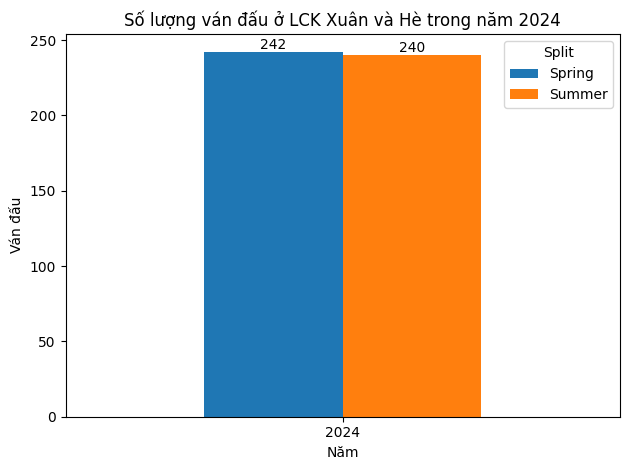

In [98]:
# Thống kê số lượng ván đấu 
plt.figure(figsize=(12, 6))
split_counts = lck_df.groupby(['year', 'split']).size().unstack(fill_value=0) // 2 
bars = split_counts.plot(kind='bar', stacked=False)
plt.title('Số lượng ván đấu ở LCK Xuân và Hè trong năm 2024')
plt.xlabel('Năm')
plt.ylabel('Ván đấu')
plt.legend(title='Split')
plt.xticks(rotation=0)

# Displaying values on top of each column
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.tight_layout()
plt.show()

b. Thống kê số lượng ván đấu theo patch (bản cập nhật)

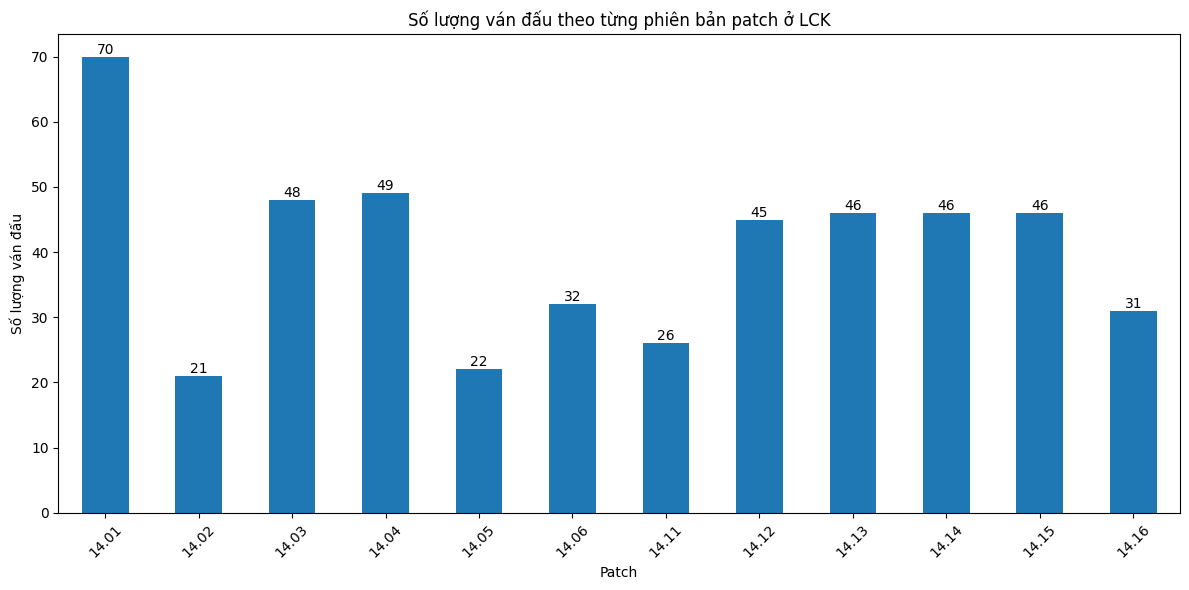

In [99]:
# Thống kê số lượng ván đấu theo patch
plt.figure(figsize=(12, 6))

# Đếm số lượng ván đấu cho mỗi patch và chia 2 vì mỗi trận có 2 bản ghi
patch_counts = lck_df['patch'].value_counts().sort_index() // 2

# Vẽ biểu đồ cột
bars = patch_counts.plot(kind='bar')
plt.title('Số lượng ván đấu theo từng phiên bản patch ở LCK')
plt.xlabel('Patch')
plt.ylabel('Số lượng ván đấu')

# Hiển thị giá trị trên đỉnh mỗi cột
for i, v in enumerate(patch_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c. Thống kê ván đấu theo time-series

c:\Users\NguyễnHoàngDuy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



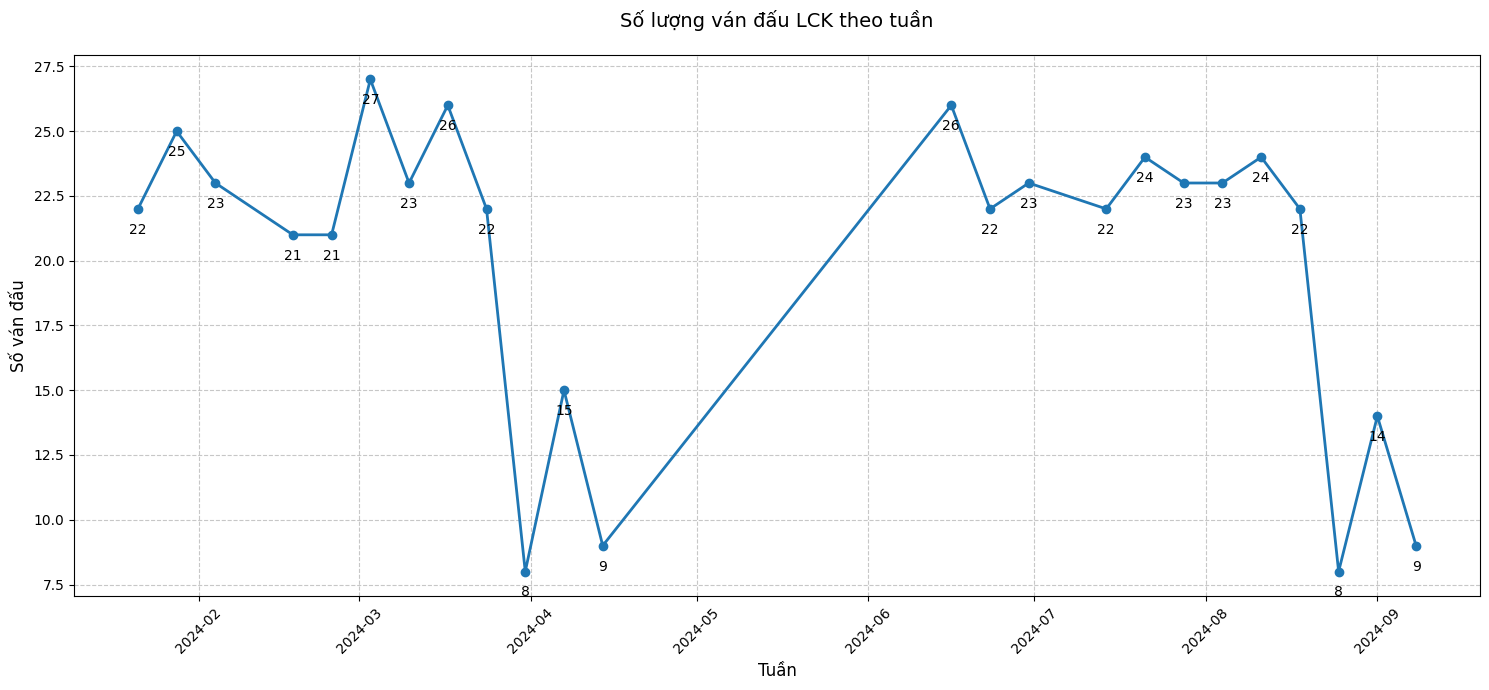


Thống kê theo tuần:
Tổng số tuần thi đấu: 24
Trung bình số trận mỗi tuần: 20.08
Số trận nhiều nhất trong một tuần: 27
Số trận ít nhất trong một tuần: 8


In [100]:
# Đổi kiểu đữ liệu 'date'
lck_data.loc[:, 'date'] = pd.to_datetime(lck_data['date'])

# Tạo figure
plt.figure(figsize=(15, 7))

# Gom nhóm theo từng tuần
weekly_games = lck_data.groupby(pd.Grouper(key='date', freq='W')).size() // 2

# Loại bỏ các tuần không có trận đấu
weekly_games = weekly_games[weekly_games > 0]

# Tạo biểu đồ time-series
plt.plot(weekly_games.index, weekly_games.values, marker='o', linewidth=2)

# Điều chỉnh biểu đồ
plt.title('Số lượng ván đấu LCK theo tuần', pad=20, fontsize=14)
plt.xlabel('Tuần', fontsize=12)
plt.ylabel('Số ván đấu', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm nhãn giá trị lên đầu mỗi điểm 
for x, y in zip(weekly_games.index, weekly_games.values):
    plt.annotate(str(int(y)), 
                (x, y),
                textcoords="offset points", 
                xytext=(0,-10), 
                ha='center',
                va='top')

plt.tight_layout()
plt.show()

# In thông số
print("\nThống kê theo tuần:")
print(f"Tổng số tuần thi đấu: {len(weekly_games)}")
print(f"Trung bình số trận mỗi tuần: {weekly_games.mean():.2f}")
print(f"Số trận nhiều nhất trong một tuần: {weekly_games.max()}")
print(f"Số trận ít nhất trong một tuần: {weekly_games.min()}")

d. Phân tích độ dài ván đấu 'gamelength'

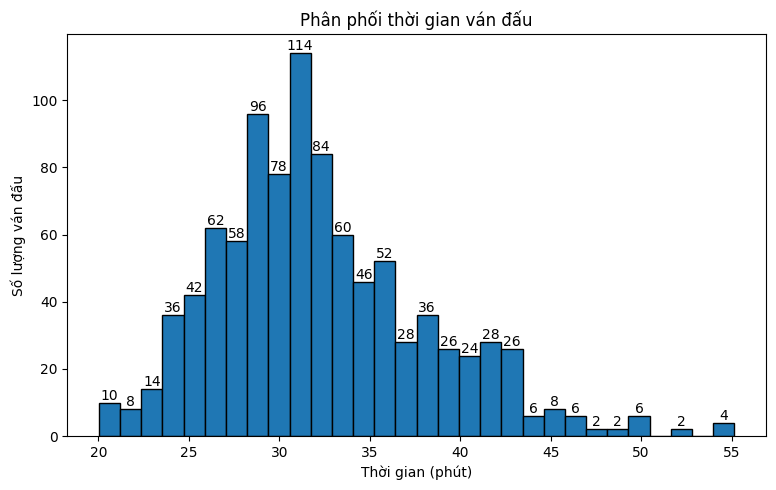

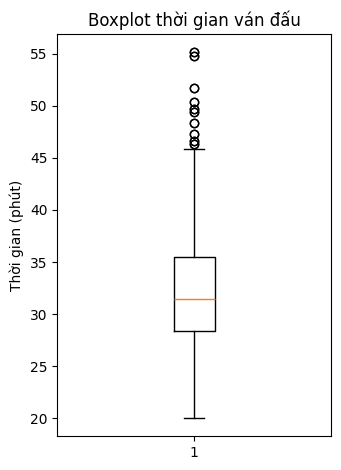


Thống kê thời gian ván đấu:
Trung bình: 32 phút 16 giây
Ngắn nhất: 20 phút 2 giây
Dài nhất: 55 phút 9 giây

Phân vị thời gian:
Phân vị 25%: 28 phút 24 giây
Phân vị 50%: 31 phút 27 giây
Phân vị 75%: 35 phút 30 giây

Thời gian phổ biến nhất: 32 phút 19 giây
Độ lệch chuẩn: 5 phút 51 giây


In [101]:
# Hàm chuyển đổi giây sang định dạng "X phút Y giây"
def format_time(seconds):
    minutes = seconds // 60
    remaining_seconds = seconds % 60
    return f"{int(minutes)} phút {int(remaining_seconds)} giây"

# Tạo figure với 2 subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
# Tạo histogram và lưu thông tin về bars
counts, bins, patches = plt.hist(lck_data['gamelength']/60, bins=30, edgecolor='black')

# Thêm nhãn giá trị lên đầu mỗi bar
for count, patch in zip(counts, patches):
    if count > 0:  # Chỉ hiển thị nhãn nếu có giá trị
        plt.text(patch.get_x() + patch.get_width()/2,  # x position
                count,                                  # y position
                int(count),                            # label (converted to integer)
                ha='center',                           # horizontal alignment
                va='bottom')                           # vertical alignment

plt.title('Phân phối thời gian ván đấu')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Số lượng ván đấu')
plt.tight_layout()
plt.show()

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(lck_data['gamelength']/60)
plt.title('Boxplot thời gian ván đấu')
plt.ylabel('Thời gian (phút)')

plt.tight_layout()
plt.show()

# In thống kê với định dạng thời gian mới
print("\nThống kê thời gian ván đấu:")
mean_time = format_time(lck_data['gamelength'].mean())
min_time = format_time(lck_data['gamelength'].min())
max_time = format_time(lck_data['gamelength'].max())

print(f"Trung bình: {mean_time}")
print(f"Ngắn nhất: {min_time}")
print(f"Dài nhất: {max_time}")

# Thêm phân tích phân vị
percentiles = [25, 50, 75]
print("\nPhân vị thời gian:")
for p in percentiles:
    time_p = format_time(np.percentile(lck_data['gamelength'], p))
    print(f"Phân vị {p}%: {time_p}")

# Tính mode (thời gian phổ biến nhất)
mode_time = format_time(lck_data['gamelength'].mode().iloc[0])
print(f"\nThời gian phổ biến nhất: {mode_time}")

# Tính độ lệch chuẩn
std_time = format_time(lck_data['gamelength'].std())
print(f"Độ lệch chuẩn: {std_time}")

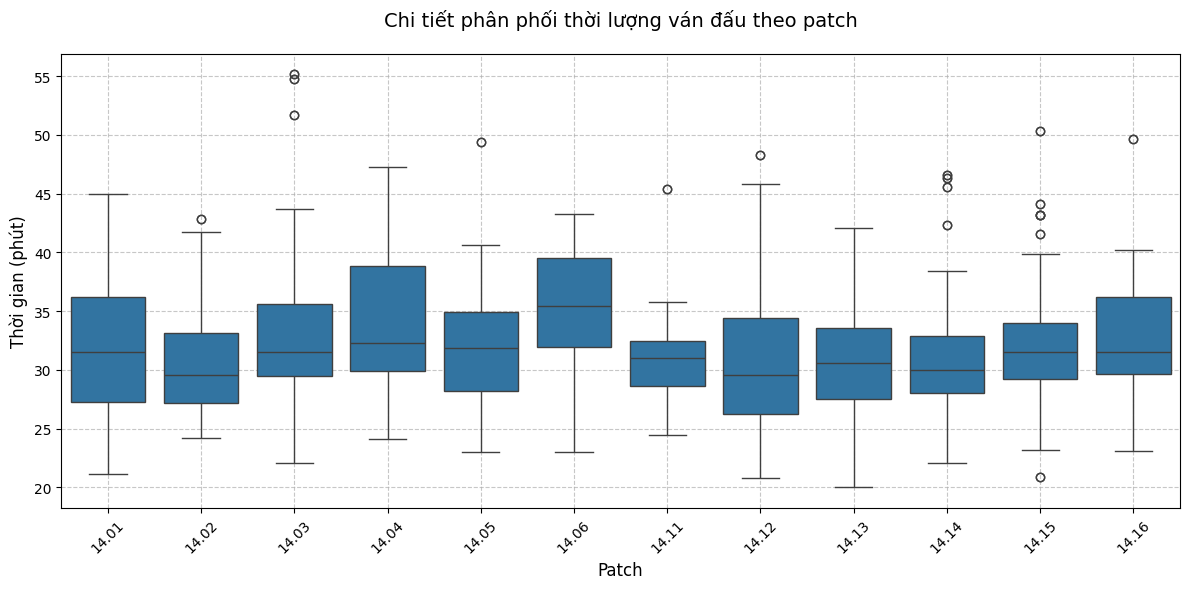

In [102]:
# Tạo cột mới chứa thời gian theo phút
lck_data['game_minutes'] = lck_data['gamelength'] / 60

# Vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=lck_data, x='patch', y='game_minutes')

# Tùy chỉnh đồ thị
plt.title('Chi tiết phân phối thời lượng ván đấu theo patch', pad=20, fontsize=14)
plt.xlabel('Patch', fontsize=12)
plt.ylabel('Thời gian (phút)', fontsize=12)
plt.xticks(rotation=45)

# Thêm lưới để dễ đọc
plt.grid(True, linestyle='--', alpha=0.7)

# Điều chỉnh layout
plt.tight_layout()

plt.show()


e. Tỷ lệ thắng theo đội Xanh/ đội Đỏ ('side') ở mỗi mùa

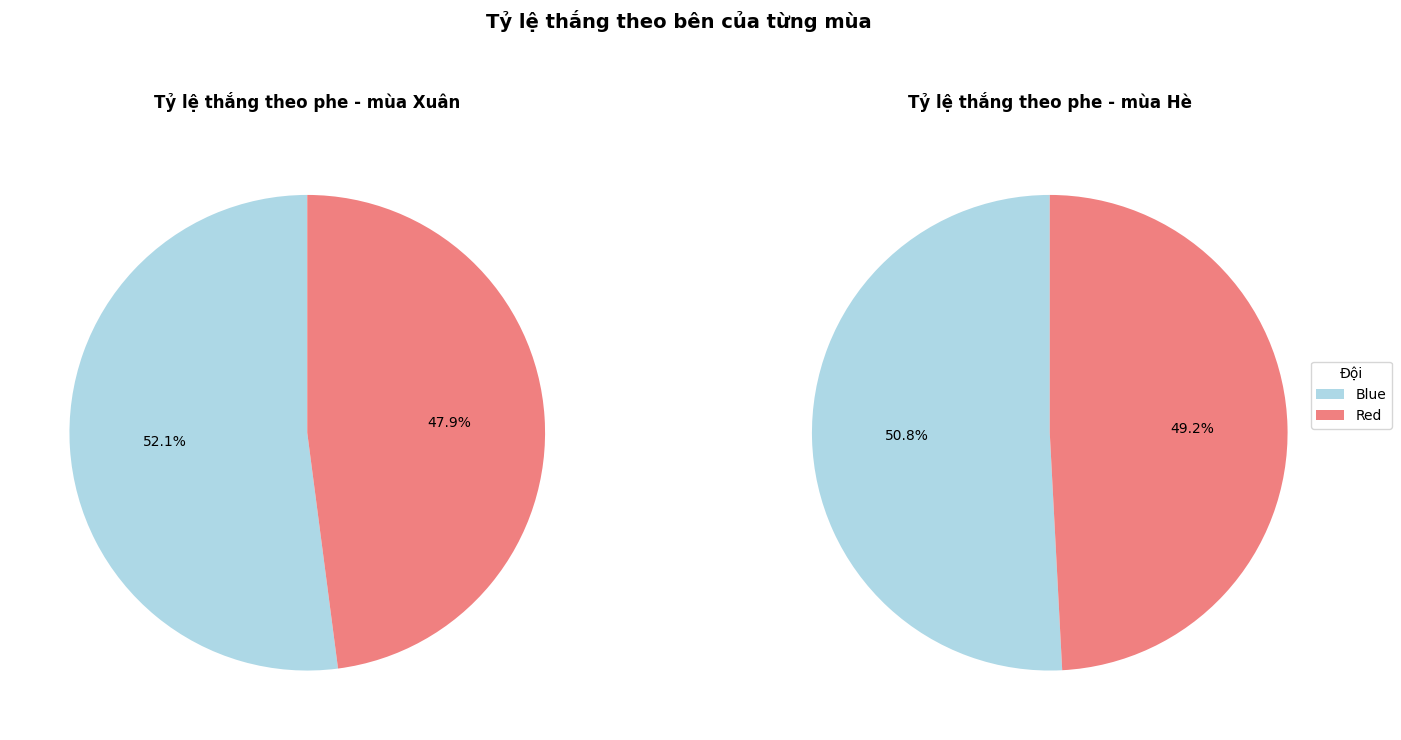

In [103]:
# Tính tỷ lệ thắng theo phe và split
split_side_winrate = lck_data.groupby(['split', 'side'])['result'].mean() * 100
split_side_winrate = split_side_winrate.unstack()  # Chuyển split thành index

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Vẽ biểu đồ tròn cho Spring
spring_data = split_side_winrate.loc['Spring']
ax1.pie(spring_data, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
ax1.set_title('Tỷ lệ thắng theo phe - mùa Xuân', pad=20, size=12, weight='bold')

# Vẽ biểu đồ tròn cho Summer
summer_data = split_side_winrate.loc['Summer']
ax2.pie(summer_data, autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=90)
ax2.set_title('Tỷ lệ thắng theo phe - mùa Hè', pad=20, size=12, weight='bold')

# Thêm chú thích chung
fig.legend(['Blue', 'Red'], 
          title='Đội',
          loc='center right',
          bbox_to_anchor=(0.98, 0.5))

# Thêm tiêu đề chung
fig.suptitle('Tỷ lệ thắng theo bên của từng mùa', size=14, weight='bold', y=1.05)

plt.tight_layout()
plt.show()


### 2. Thống kê theo các đội tuyển
- team_identity_cols = ['participantid', 'side', 'position', 'teamname', 'teamid']

In [104]:
# Copy df để tiện thay đổi
lck_data = lck_df.copy()

a. Thống kê số lượng ván đấu, tỉ lệ chọn bên theo mỗi đội 

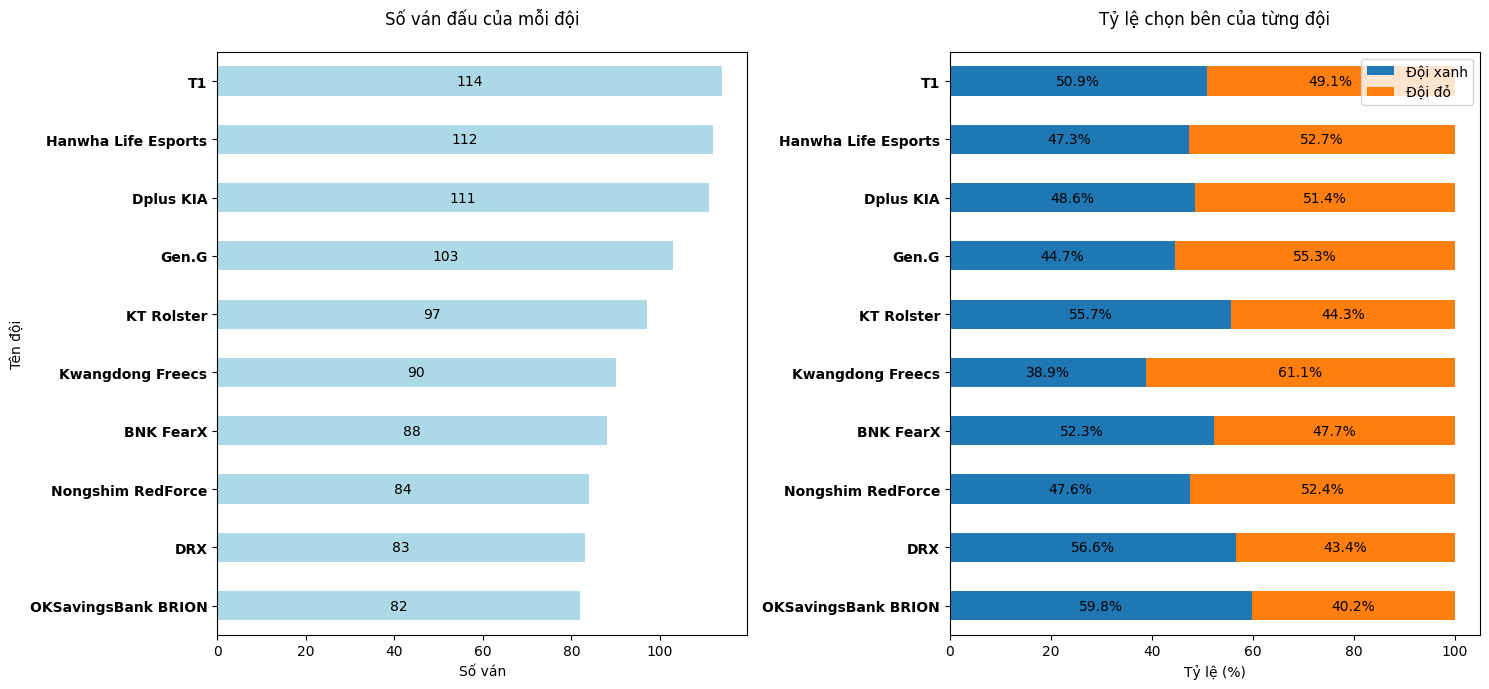

In [105]:
# Thống kê số lượng trận của mỗi đội
team_counts = lck_data['teamname'].value_counts().sort_values(ascending=True)  # Sắp xếp tăng dần

# Tính tỷ lệ xuất hiện ở mỗi bên của từng đội
team_side_distribution = pd.crosstab(lck_data['teamname'], lck_data['side'], normalize='index') * 100
team_side_distribution = team_side_distribution.reindex(team_counts.index)  # Sắp xếp theo thứ tự giống team_counts

# Tạo figure với 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# 1. Biểu đồ số trận của mỗi đội - dạng ngang
bars = team_counts.plot(kind='barh', ax=ax1, color='lightblue')
ax1.set_title('Số ván đấu của mỗi đội', pad=20)
ax1.set_xlabel('Số ván')
ax1.set_ylabel('Tên đội')
ax1.set_yticklabels(ax1.get_yticklabels(), weight='bold')

# Thêm nhãn giá trị vào giữa mỗi thanh
for i, v in enumerate(team_counts):
    ax1.text(v/2, i, str(v), 
             ha='center',    # Căn giữa theo chiều ngang
             va='center',    # Căn giữa theo chiều dọc
             color='black')

# 2. Biểu đồ tỷ lệ xuất hiện ở mỗi bên
ax = team_side_distribution.plot(kind='barh', ax=ax2, stacked=True)
ax2.set_title('Tỷ lệ chọn bên của từng đội', pad=20)
ax2.set_xlabel('Tỷ lệ (%)')
ax2.set_ylabel('')
ax2.legend(['Đội xanh', 'Đội đỏ'])
ax2.set_yticklabels(ax1.get_yticklabels(), weight='bold')

# Thêm nhãn giá trị vào giữa mỗi phần của thanh
for i in range(len(team_side_distribution)):
    # Tính toán vị trí cho blue side (bắt đầu từ 0)
    blue_width = team_side_distribution.iloc[i, 0]
    ax2.text(blue_width/2, i, f"{blue_width:.1f}%",
             ha='center', va='center',
             color='black')
    
    # Tính toán vị trí cho red side (bắt đầu từ blue_width)
    red_width = team_side_distribution.iloc[i, 1]
    ax2.text(blue_width + red_width/2, i, f"{red_width:.1f}%",
             ha='center', va='center',
             color='black')

plt.tight_layout()
plt.show()



b. Thống kê số lượng ván đấu ở vòng bảng và playoffs của mỗi đội

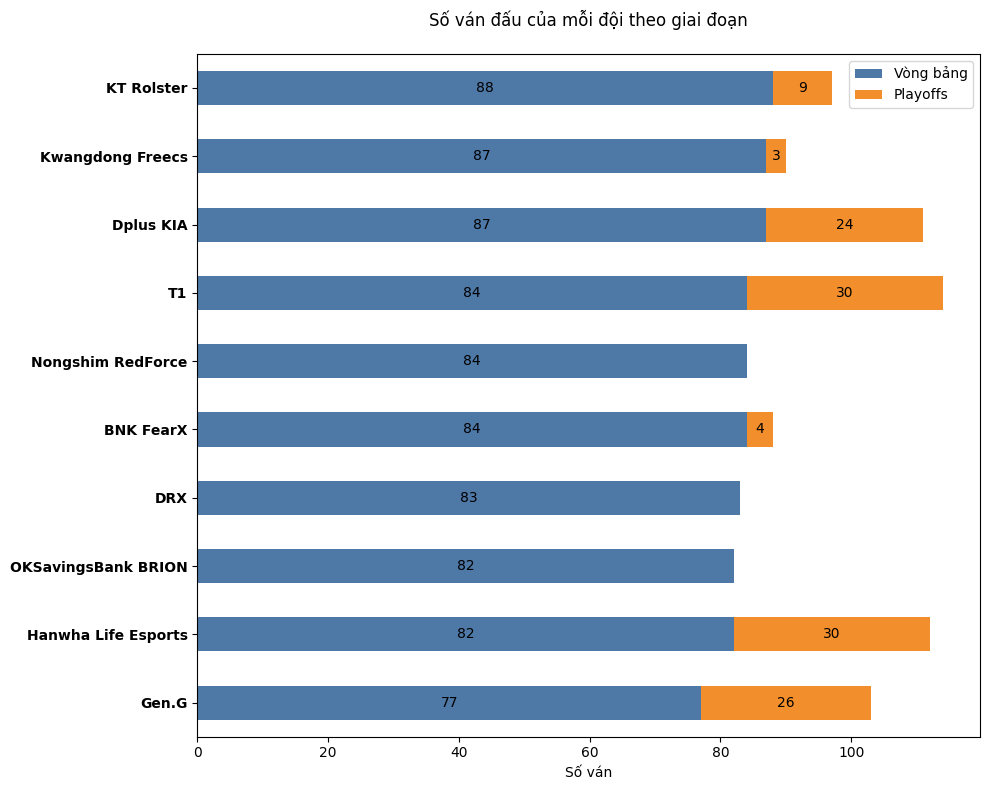

In [106]:
# Tạo DataFrame thống kê số trận theo đội và playoffs
team_playoff_counts = pd.crosstab(lck_data['teamname'], lck_data['playoffs'])
team_playoff_counts.columns = ['Vòng bảng', 'Playoffs']  # Đổi tên cột cho dễ hiểu
team_playoff_counts = team_playoff_counts.sort_values('Vòng bảng', ascending=True)  # Sắp xếp theo số trận vòng bảng

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))
bars = team_playoff_counts.plot(kind='barh', ax=ax, stacked=True, 
                              color=['#4e79a7', '#f28e2b'])

# Chỉnh sửa biểu đồ
ax.set_title('Số ván đấu của mỗi đội theo giai đoạn', pad=20)
ax.set_xlabel('Số ván')
ax.set_ylabel('')  # Bỏ ylabel vì đã có tên đội
ax.set_yticklabels(ax.get_yticklabels(), weight='bold')
ax.legend(title='')

# Thêm nhãn giá trị vào mỗi phần của thanh
for i in range(len(team_playoff_counts)):
    # Vòng bảng
    regular_matches = team_playoff_counts.iloc[i, 0]
    if regular_matches > 0:
        ax.text(regular_matches/2, i, str(regular_matches),
                ha='center', va='center', color='black')
    
    # Playoffs
    playoff_matches = team_playoff_counts.iloc[i, 1]
    if playoff_matches > 0:
        ax.text(regular_matches + playoff_matches/2, i, str(playoff_matches),
                ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

### 3. Thống kê ban/pick
- draft_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

### 4. Thống kê về KDA/combat
- combat_cols = ['kills', 'deaths', 'assists', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm']

### 5. Thống kê về quái khủng 
- objectives_cols = ['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
                  'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders',
                  'firstherald', 'heralds', 'firstbaron', 'barons']

### 6. Thống kê về công trình 
- structure_cols = ['firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                 'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors']

### 7. Thống kê về sát thương và tầm nhìn
- damage_vision_cols = ['damagetochampions', 'dpm', 'damagetakenperminute', 'damagemitigatedperminute',
                     'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm']

### 8. Thống kê về vàng/tài nguyên liên quan 
- economy_cols = ['totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'gspd', 'gpr',
                'minionkills', 'monsterkills', 'cspm']